In [1]:
import pandas as pd
import os
os.getcwd()
bank_df = pd.read_csv('../data/bank-prep.csv', sep=',')
#C:\\Users\\user\\Desktop\\AI 실습\\파이썬데이터 분석\\data\\bank-prep.csv
bank_df.head()

,age,default,balance,loan,day,duration,campaign,pdays,previous,y,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,0,5,261,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,5,348,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,0,5,365,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,5,1666,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,5,145,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
bank_df_pca = pca.fit_transform(bank_df_sc)

print(pca.n_components_)
print(bank_df_pca.shape)

18
(6933, 18)


In [11]:
y = pd.read_csv('../data/bank-prep.csv', sep=',')['y']
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
6928    0
6929    1
6930    0
6931    0
6932    1
Name: y, Length: 6933, dtype: int64


In [16]:
bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y
print(bank_df_pca.shape)
print(bank_df_pca)

(6933, 19)
             0         1         2         3         4         5         6  \
0    -2.066400  0.901689  0.545575  1.930463 -0.900185  0.340225  0.346553   
1    -2.292393 -2.626270  0.277499 -0.586547 -0.018635 -0.342242 -0.057734   
2    -2.574350 -0.968757  1.061501 -0.506883 -1.012169 -0.060720  1.195264   
3    -2.360338 -0.097053  2.039684  0.169390  1.405604 -0.296795  2.887949   
4    -2.308022 -3.079531  0.000461 -0.754381 -0.566293 -0.259946 -0.247247   
...        ...       ...       ...       ...       ...       ...       ...   
6928  1.813013 -2.359591  0.770691 -0.834734 -0.333869  0.739371 -0.756156   
6929  2.743848 -1.842520 -0.150333  1.976529  0.948672  1.019543  0.649291   
6930  2.103856  1.715265  1.124256  0.393837 -0.884287  1.147959 -1.213413   
6931  1.327679  1.109769 -0.816693  0.857529 -0.576852  0.716147  0.454839   
6932  1.601943 -2.110052 -0.456730 -1.020569  1.711814 -0.018790  1.121086   

             7         8         9        10        

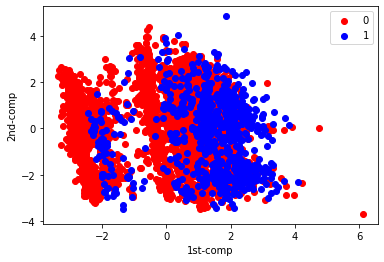

In [19]:
import matplotlib.pyplot as plt

bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y', axis = 1)
#bank_df_pca_0.head()

plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c='red', label=0)

bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis = 1)
#bank_df_pca_0.head()

plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label=1)

plt.legend()

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')

plt.show()